In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:

csv_path = "/Users/diya/SmartRoom/room_data/Room1.csv"
df = pd.read_csv(csv_path)
print("📊 Dataset Summary")
print(f"File: {csv_path}")
print(f"Number of data points: {len(df)}")
print(f"Columns: {list(df.columns)}\n")
numeric_cols = df.select_dtypes(include='number').columns
print("Column Stats:")
for col in numeric_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    col_range = col_max - col_min
    print(f"{col}:")
    print(f"  Min: {col_min}")
    print(f"  Max: {col_max}")
    print(f"  Range: {col_range}\n")


# Room1


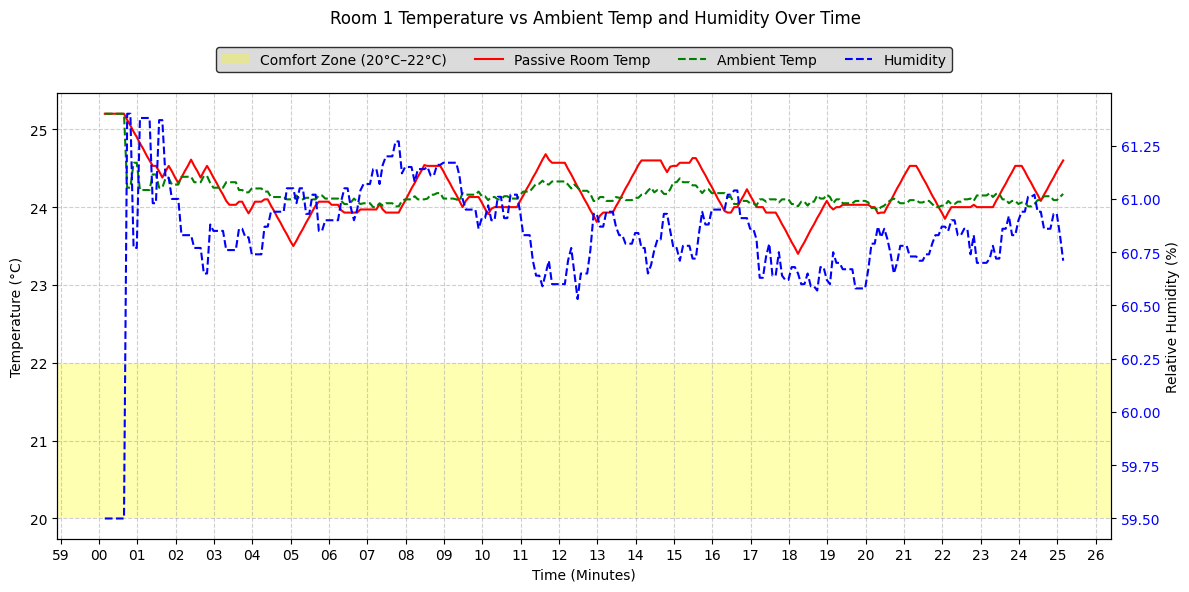

In [108]:
# Simulate room running with HVAC off 
comfort_range=[20,22]
passive_csv = "/Users/diya/SmartRoom/room1_output/output_csv_passive.csv"
passive_df = pd.read_csv(passive_csv)

passive_df["time"] = pd.to_datetime(passive_df["time"])
passive_df["room_temp"] = pd.to_numeric(passive_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.axhspan(comfort_range[0], comfort_range[1], facecolor='yellow', alpha=0.3, label="Comfort Zone (20°C–22°C)")

ax1.plot(passive_df["time"], passive_df["room_temp"], label="Passive Room Temp", linestyle='-', color="red")
ax1.plot(passive_df["time"], passive_df["ambient_temp"], label="Ambient Temp", linestyle='--', color='green')
ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

ax2 = ax1.twinx()
ax2.plot(passive_df["time"], passive_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)")
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle("Room 1 Temperature vs Ambient Temp and Humidity Over Time")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=5,
    frameon=True,
    facecolor='lightgray',
    edgecolor='black',
    framealpha=0.8
)

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


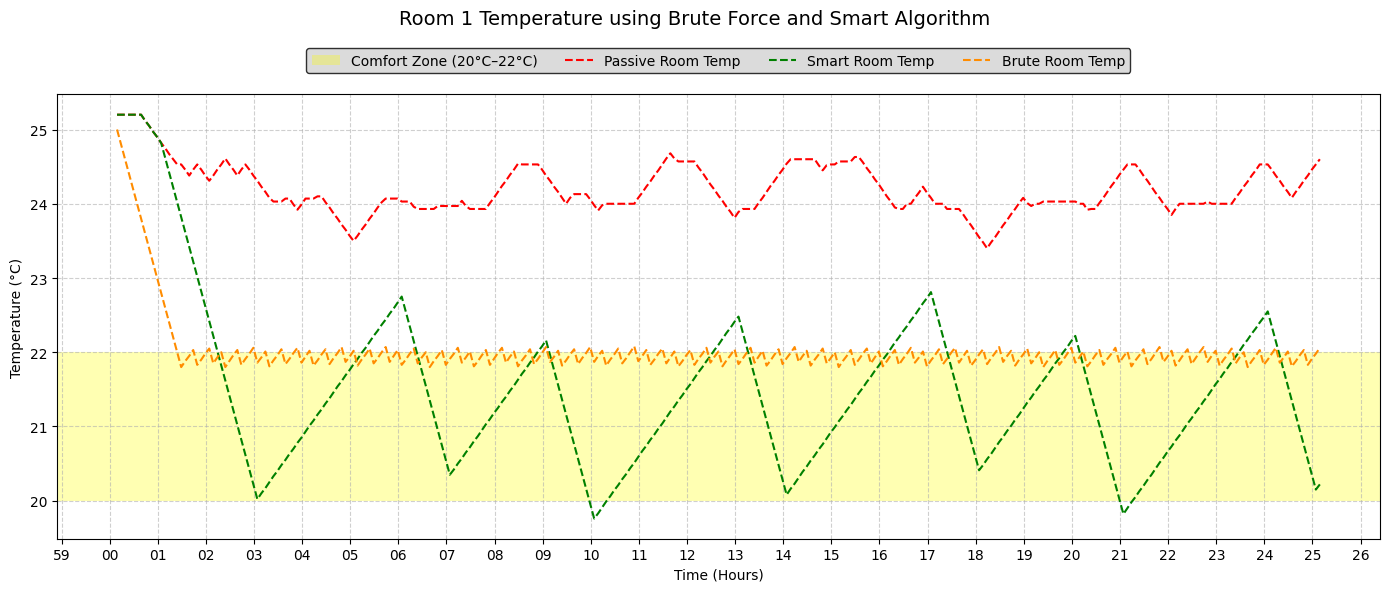

In [110]:
# ROOM 1 testing 
comfort_range=[20,22]
smart_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_smart.csv")
brute_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_brute.csv")
passive_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_passive.csv")

for df in [smart_df, brute_df, passive_df]:
    df["time"] = pd.to_datetime(df["time"])

for df in [smart_df, brute_df, passive_df]:
    df["room_temp"] = pd.to_numeric(df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.axhspan(comfort_range[0], comfort_range[1], facecolor='yellow', alpha=0.3, label=f"Comfort Zone ({comfort_range[0]}°C–{comfort_range[1]}°C)")
ax1.plot(passive_df["time"], passive_df["room_temp"], label="Passive Room Temp", linestyle='--', color="red")
ax1.plot(smart_df["time"], smart_df["room_temp"], label="Smart Room Temp", linestyle='--', color='green')
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Brute Room Temp", linestyle='--', color='darkorange')

ax1.set_xlabel("Time (Hours)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
fig.suptitle("Room 1 Temperature using Brute Force and Smart Algorithm", fontsize=14)
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=4,
    frameon=True,
    facecolor='lightgray',
    edgecolor='black',
    framealpha=0.8
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

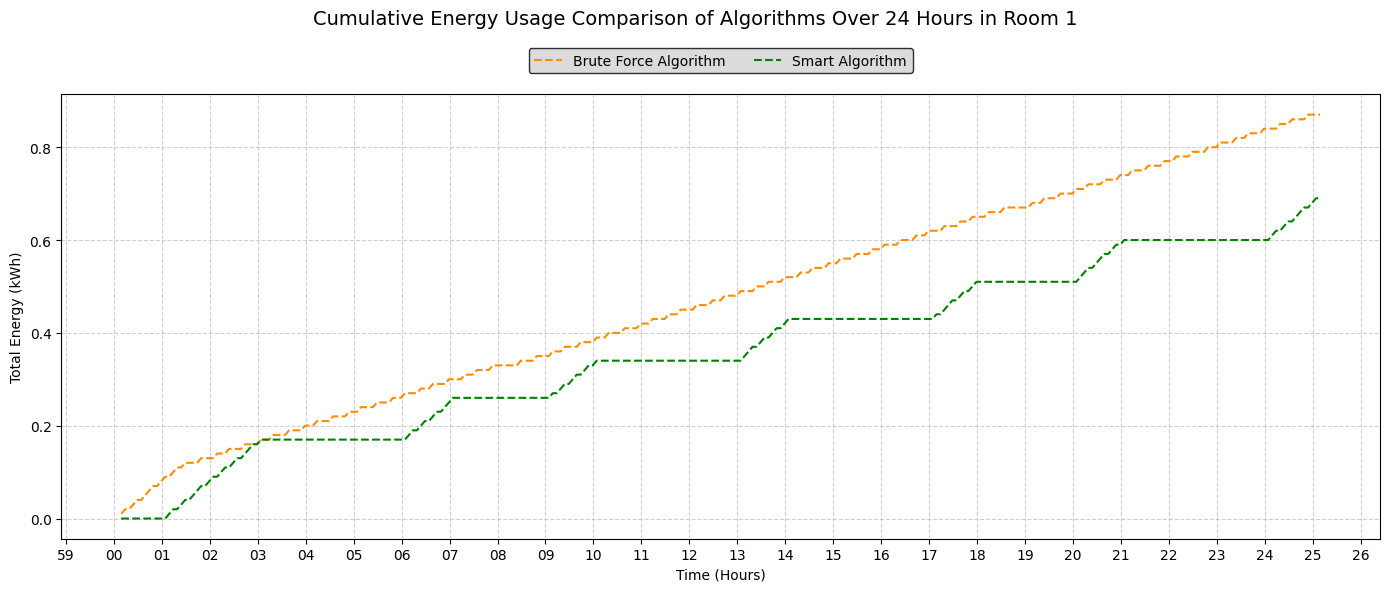

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read and parse
brute_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_brute.csv")
smart_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_smart.csv")

brute_df['time'] = pd.to_datetime(brute_df['time'])
smart_df['time'] = pd.to_datetime(smart_df['time'])

# Create plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot energy curves
ax.plot(brute_df['time'], brute_df['total_energy'], label='Brute Force Algorithm', linestyle='--', color='darkorange')
ax.plot(smart_df['time'], smart_df['total_energy'], label='Smart Algorithm', linestyle='--', color='green')

# Set matching x-axis formatting (same as room temp plot)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M'))

# Labels and Title
ax.set_xlabel("Time (Hours)")
ax.set_ylabel("Total Energy (kWh)")
fig.suptitle("Cumulative Energy Usage Comparison of Algorithms Over 24 Hours in Room 1", fontsize=14)

# Legend styling
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=2,
    frameon=True,
    facecolor='lightgray',
    edgecolor='black',
    framealpha=0.8
)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


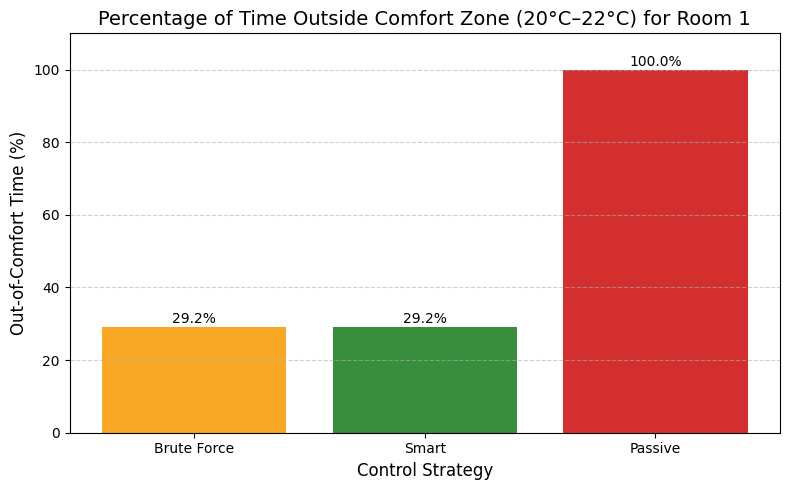

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

comfort_range=[20,22]
smart_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_smart.csv")
brute_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_brute.csv")
passive_df = pd.read_csv("/Users/diya/SmartRoom/room1_output/output_csv_passive.csv")

for df in [brute_df, smart_df, passive_df]:
    df["time"] = pd.to_datetime(df["time"])
    df["room_temp"] = pd.to_numeric(df["room_temp"], errors="coerce")


def count_out_of_range(df):
    total = df["room_temp"].notna().sum()
    if total == 0:
        return 0
    violations = ((df["room_temp"] < comfort_range[0]) | (df["room_temp"] > comfort_range[1])).sum()
    return 100 * violations / total

passive_percent = count_out_of_range(passive_df)
brute_percent = count_out_of_range(brute_df)
smart_percent = count_out_of_range(smart_df)


methods = ['Brute Force', 'Smart', 'Passive']
values = [brute_percent, smart_percent, passive_percent]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=['#F9A825', '#388E3C', '#D32F2F'])
plt.xlabel("Control Strategy", fontsize=12)
plt.ylabel("Out-of-Comfort Time (%)", fontsize=12)
plt.title("Percentage of Time Outside Comfort Zone (20°C–22°C) for Room 1", fontsize=14)
plt.ylim(0, 110)

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Room  2


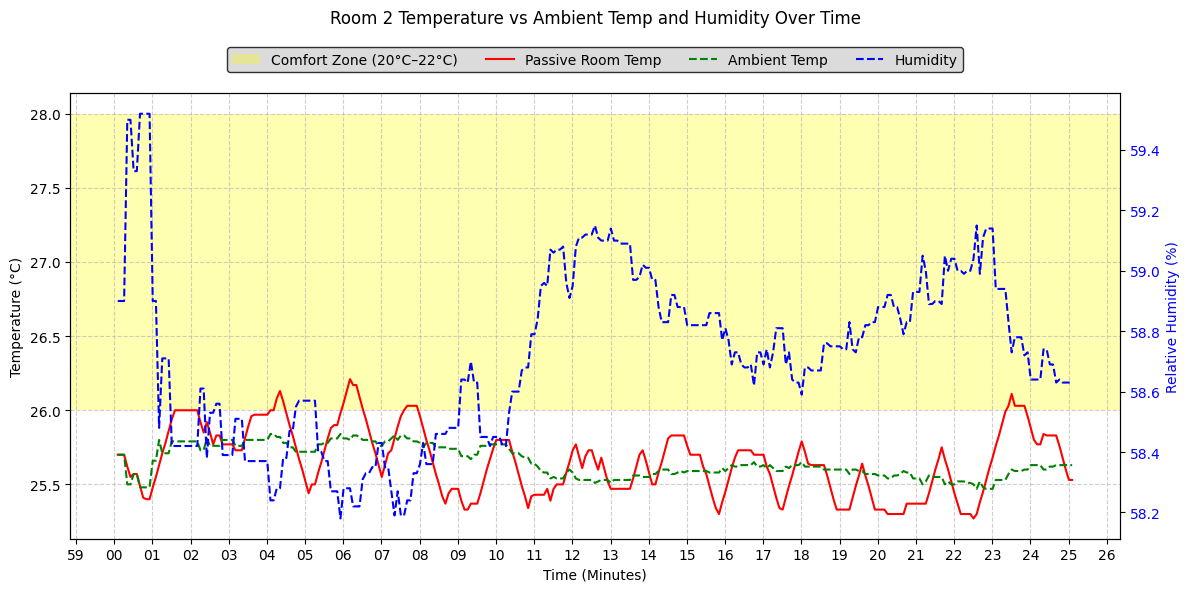

In [109]:
# Simulate room running with HVAC off 
comfort_range=[26,28]
passive_csv = "/Users/diya/SmartRoom/room2_output/output_csv_passive.csv"
passive_df = pd.read_csv(passive_csv)

passive_df["time"] = pd.to_datetime(passive_df["time"])
passive_df["room_temp"] = pd.to_numeric(passive_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.axhspan(comfort_range[0], comfort_range[1], facecolor='yellow', alpha=0.3, label="Comfort Zone (20°C–22°C)")

ax1.plot(passive_df["time"], passive_df["room_temp"], label="Passive Room Temp", linestyle='-', color="red")
ax1.plot(passive_df["time"], passive_df["ambient_temp"], label="Ambient Temp", linestyle='--', color='green')
ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

ax2 = ax1.twinx()
ax2.plot(passive_df["time"], passive_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle("Room 2 Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=5,
    frameon=True,
    facecolor='lightgray',
    edgecolor='black',
    framealpha=0.8
)
ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


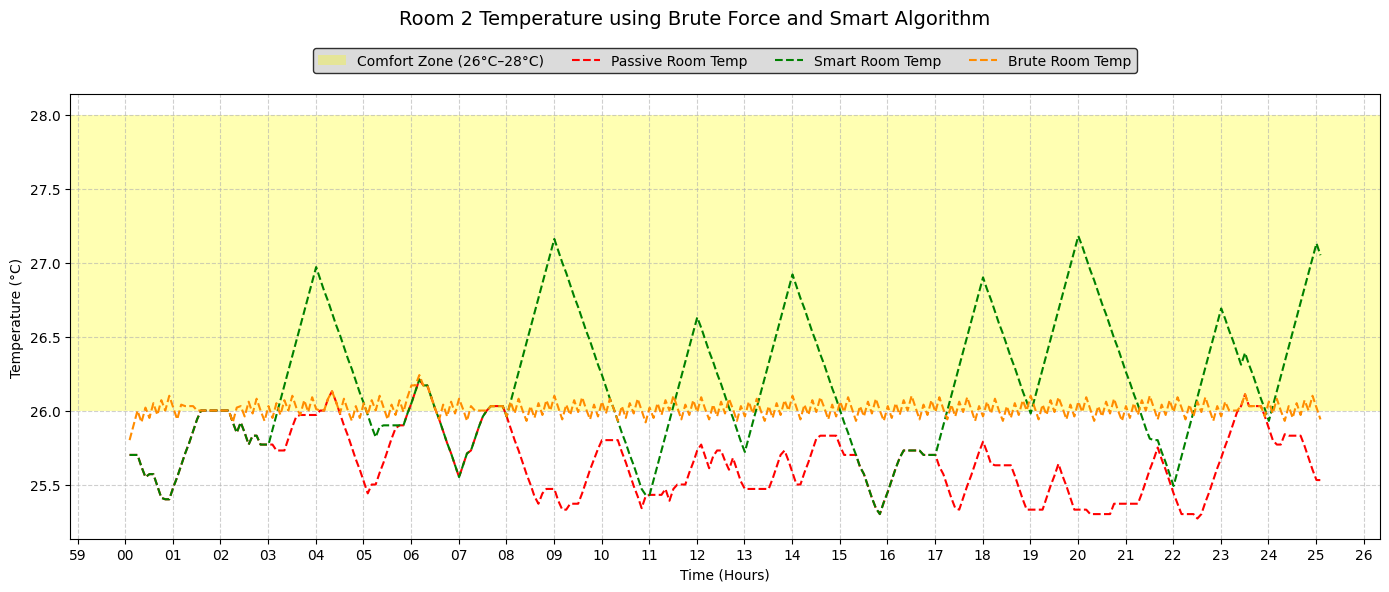

In [101]:
# ROOM 1 testing 
comfort_range=[26,28]
smart_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_smart.csv")
brute_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_brute.csv")
passive_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_passive.csv")

for df in [smart_df, brute_df, passive_df]:
    df["time"] = pd.to_datetime(df["time"])

for df in [smart_df, brute_df, passive_df]:
    df["room_temp"] = pd.to_numeric(df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.axhspan(comfort_range[0], comfort_range[1], facecolor='yellow', alpha=0.3, label=f"Comfort Zone ({comfort_range[0]}°C–{comfort_range[1]}°C)")
ax1.plot(passive_df["time"], passive_df["room_temp"], label="Passive Room Temp", linestyle='--', color="red")
ax1.plot(smart_df["time"], smart_df["room_temp"], label="Smart Room Temp", linestyle='--', color='green')
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Brute Room Temp", linestyle='--', color='darkorange')

ax1.set_xlabel("Time (Hours)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
fig.suptitle("Room 2 Temperature using Brute Force and Smart Algorithm", fontsize=14)
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=4,
    frameon=True,
    facecolor='lightgray',
    edgecolor='black',
    framealpha=0.8
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

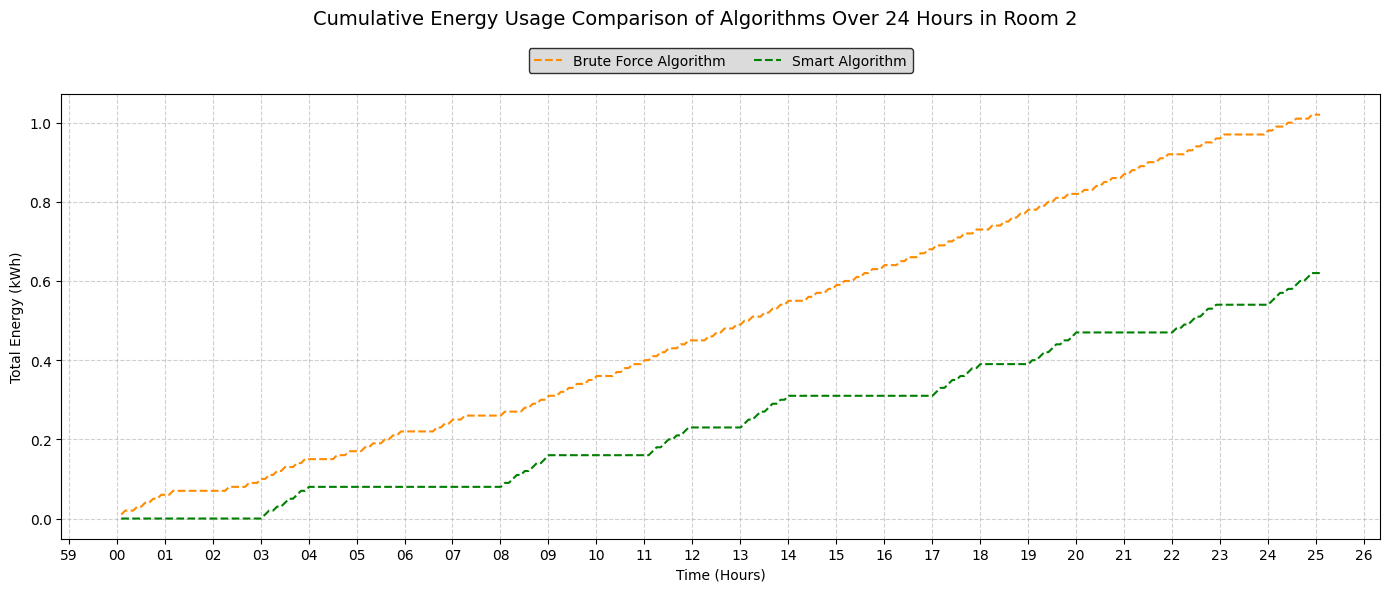

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read and parse
brute_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_brute.csv")
smart_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_smart.csv")

brute_df['time'] = pd.to_datetime(brute_df['time'])
smart_df['time'] = pd.to_datetime(smart_df['time'])

# Create plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot energy curves
ax.plot(brute_df['time'], brute_df['total_energy'], label='Brute Force Algorithm', linestyle='--', color='darkorange')
ax.plot(smart_df['time'], smart_df['total_energy'], label='Smart Algorithm', linestyle='--', color='green')

# Set matching x-axis formatting (same as room temp plot)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M'))

# Labels and Title
ax.set_xlabel("Time (Hours)")
ax.set_ylabel("Total Energy (kWh)")
fig.suptitle("Cumulative Energy Usage Comparison of Algorithms Over 24 Hours in Room 2", fontsize=14)

# Legend styling
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=2,
    frameon=True,
    facecolor='lightgray',
    edgecolor='black',
    framealpha=0.8
)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


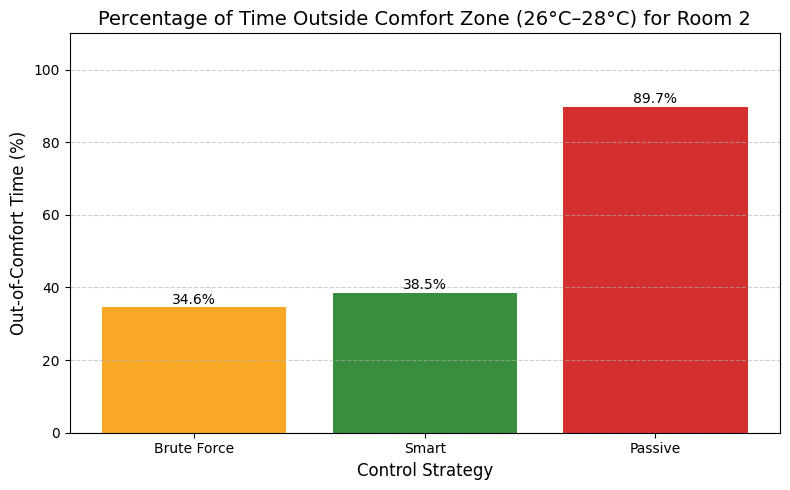

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

comfort_range=[26,28]
smart_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_smart.csv")
brute_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_brute.csv")
passive_df = pd.read_csv("/Users/diya/SmartRoom/room2_output/output_csv_passive.csv")

for df in [brute_df, smart_df, passive_df]:
    df["time"] = pd.to_datetime(df["time"])
    df["room_temp"] = pd.to_numeric(df["room_temp"], errors="coerce")


def count_out_of_range(df):
    total = df["room_temp"].notna().sum()
    if total == 0:
        return 0
    violations = ((df["room_temp"] < comfort_range[0]) | (df["room_temp"] > comfort_range[1])).sum()
    return 100 * violations / total

passive_percent = count_out_of_range(passive_df)
brute_percent = count_out_of_range(brute_df)
smart_percent = count_out_of_range(smart_df)


methods = ['Brute Force', 'Smart', 'Passive']
values = [brute_percent, smart_percent, passive_percent]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=['#F9A825', '#388E3C', '#D32F2F'])
plt.xlabel("Control Strategy", fontsize=12)
plt.ylabel("Out-of-Comfort Time (%)", fontsize=12)
plt.title(f"Percentage of Time Outside Comfort Zone ({comfort_range[0]}°C–{comfort_range[1]}°C) for Room 2", fontsize=14)
plt.ylim(0, 110)

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
